# CNN from Scratch

In the below code we will create a CNN model from scratch and use it for classification of CIFAR10 dataset

## Importing the necessary Libraries

In [1]:
# Import Necessary Library
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, Callback

## Loading the CIFAR10 dataset

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


## Exploratory Data Analysis and Data Preprocessing

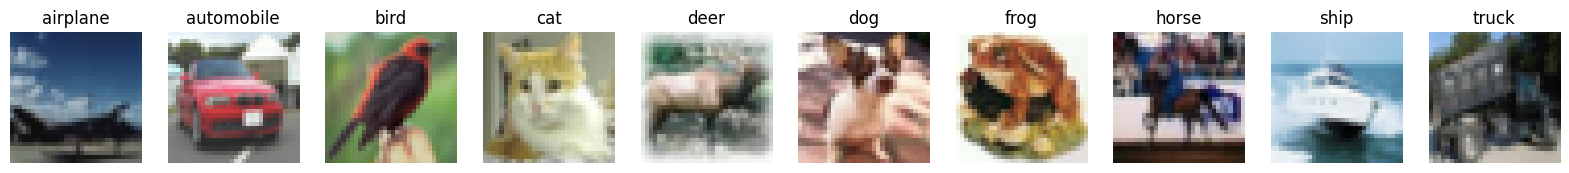

In [3]:
# Displaying a random images from each of 10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, ax = plt.subplots(1, len(class_names), figsize=(20, 20))
for i in range(len(class_names)):
    class_indices = np.where(y_train == i)[0]
    random_index = random.choice(class_indices)
    ax[i].imshow(x_train[random_index])
    ax[i].axis('off')
    ax[i].set_title(class_names[i])
plt.show()

In [4]:
# Preprocess the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
# Custom callback to stop training when accuracy is above 98%
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['val_accuracy'] > 0.98:
            print(f'\nReached 95% validation accuracy. Stopping training.')
            self.model.stop_training = True

## CNN Model from Scratch

In [6]:
# Build a model
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model1.add(Activation('relu'))
model1.add(Conv2D(32, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(64, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))

model1.add(Dense(10))
model1.add(Activation('softmax'))

## Model Training

In [7]:
# Code with best epoch using early stopping and custom callback
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
cc = CustomCallback()
history = model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model1.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[es, cc])

Epoch 1/50
625/625 [==============================] - 105s 167ms/step - loss: 1.6346 - accuracy: 0.3993 - val_loss: 1.2281 - val_accuracy: 0.5694
Epoch 2/50
625/625 [==============================] - 104s 167ms/step - loss: 1.2159 - accuracy: 0.5661 - val_loss: 1.0525 - val_accuracy: 0.6272
Epoch 3/50
625/625 [==============================] - 103s 164ms/step - loss: 1.0342 - accuracy: 0.6340 - val_loss: 0.9299 - val_accuracy: 0.6706
Epoch 4/50
625/625 [==============================] - 105s 168ms/step - loss: 0.9375 - accuracy: 0.6708 - val_loss: 0.8326 - val_accuracy: 0.7145
Epoch 5/50
625/625 [==============================] - 107s 172ms/step - loss: 0.8477 - accuracy: 0.7041 - val_loss: 0.7670 - val_accuracy: 0.7346
Epoch 6/50
625/625 [==============================] - 107s 171ms/step - loss: 0.7948 - accuracy: 0.7229 - val_loss: 0.7657 - val_accuracy: 0.7344
Epoch 7/50
625/625 [==============================] - 107s 171ms/step - loss: 0.7406 - accuracy: 0.7400 - val_loss: 0.7364 -

In [8]:
##Getting Summary of the model developed
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

## Model Test Accuracy

In [9]:
test_loss, test_acc = model1.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')

313/313 [==============================] - 12s 38ms/step - loss: 0.6967 - accuracy: 0.7734
Test accuracy: 0.77


## Accuracy and Error plot

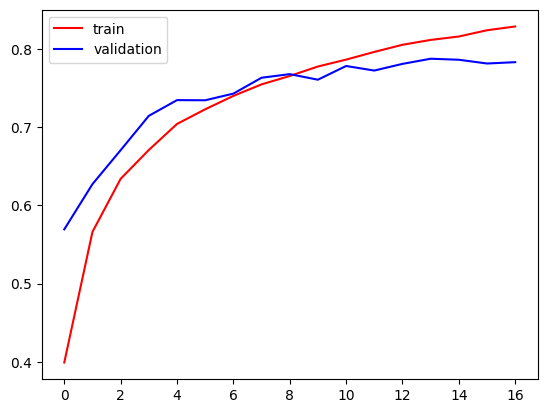

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

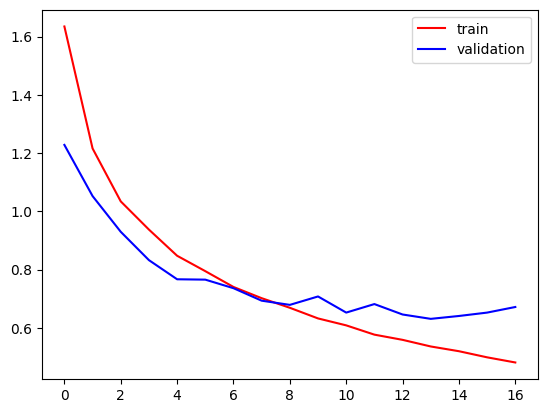

In [11]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()